# <font color=blue>**Results of Workflow analysis** </font>

## please enter the URL in Iframe src to display the result of workflow analysis

In [1]:
IRdisplay::display_html('<iframe src="" width=750, height=750></iframe> ')

### The screenshot of the workbench workflows 

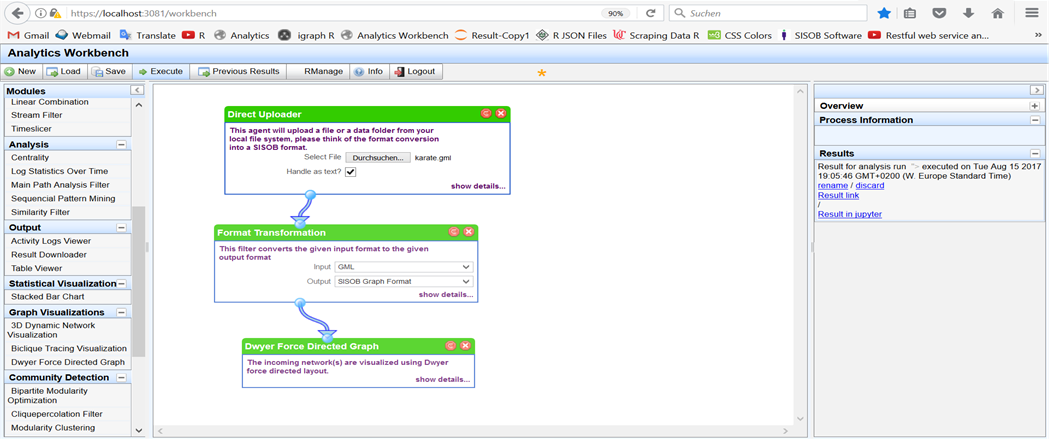

In [3]:
IRdisplay::display_png(file="C:/Users/Mahaganapathy/Desktop/screenshot/graph.png")

# Postprocessing the results

### connection to the database

In [4]:
library("RPostgreSQL")
drv <- dbDriver("PostgreSQL")
con <- dbConnect(drv, dbname = "workbench",
                 host = "localhost", port = 5432,
                 user = "workbench", password ="workbench")


### obtain runid of the workflow

In [ ]:
get_runid<-dbGetQuery(con, "SELECT result ->> 'runid' AS runid,
result ->>'instanceid' as instanceid
FROM result
where result->>'resultinfo'=
'https://localhost:3081/results/c3c94840-b9b8-4e94-98da-699d7295e022/508430Dh/index.html'")
get_runid

###  The workbench uses JSON data for internal dataflow and for external exchange format  
###  Get the path of the json file where the results are stored using the runid in the result folder

In [ ]:
library(jsonlite)
library(plyr)
library(igraph)


## we can either choose the file or give path where the result is stored  


In [7]:
## 1. select the JSON file from the result folder
##graph <- fromJSON(file.choose())
## 2. Give the path of the JSON file
graph <- fromJSON("C:/NetBeansProjects/workbench/trunk/webworkbench/results/f8c6594d-3bf2-488a-b9c4-3912bbd18591/508430Dh/0.json")



In [ ]:
library(jsontoigraph)
g<-jsontoigraph(graph)
deg <- degree(g, mode="all")
plot(g,vertex.color=deg)

# plotting degree distribution

In [ ]:
plot(degree_distribution(g), type="l")